In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from math import sqrt

#imports locais
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Funções para resolução do sistema

In [2]:
def eliminacao_gauss(matriz, dimensao, b):
    x = []
    for i in range(dimensao):
        x.append(1)

    for k in range(0, dimensao - 1  ):
        i = k+1
        for i in range(k+1, dimensao ):
            m = matriz[i][k]/matriz[k][k]
            matriz[i][k] = 0
            j = k+1
            for j in range(k+1, dimensao):
                matriz[i][j] = matriz[i][j] - (m * matriz[k][j])

            b[i] = b[i] - m * b[k]


    x[dimensao - 1] = b[dimensao-1] / matriz[dimensao-1][dimensao-1]
    for i in range(dimensao-2, -1, -1):
        soma = 0
        for j in range(i+1, dimensao):
            soma = soma + matriz[i][j] * x[j]

        x[i] = (b[i] - soma)/matriz[i][i]

    return x, matriz

In [3]:
def calc_erro(x_atual,x_ant, err_list):
    num = []
    for i in range (len(x_atual)):
        num.append(abs(x_atual[i] - x_ant[i]))

    err = max(num)/abs(max(x_atual))
    err_list.append(err)
    return err


In [4]:

def gaussSeidel(matriz, b, tol , stop ):
    err_list = []
    x_ant = []
    x_atual = []
    for i in range(len(b)):
        x_ant.append(0) 
        x_atual.append(0)

    k = 1
    while(k <= stop):
        for i in range(0,len(b)):
            alpha = 0
            for j in range(0, i):
                alpha = alpha + matriz[i][j] * x_atual[j]
            for j in range(i+1, len(b)):
                alpha = alpha + matriz[i][j] * x_ant[j]
            x_atual[i] = (b[i] - alpha) / matriz[i][i]
        
        if( abs(calc_erro(x_atual,x_ant, err_list)) < tol):
            return x_atual, err_list
        for i in range(len(x_atual)):
            x_ant[i] = x_atual[i]
        k = k+1

    print('numero de iteracoes expirados')
    return x_atual, err_list


## Criando um dataframe com a base de dados

## Realizando a leitura da base de dados

In [5]:
df = pd.read_csv('input/machine.data',  header=None)

In [6]:
df.columns = ['vendon_names','model','MYCT','MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP']

10 primeiros itens do dataset

In [7]:
df.head(10)

,vendon_names,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [9]:
df = df.drop(columns=['vendon_names', 'model'])
df.shape
df_y = df['ERP']
df = df.drop(columns=['ERP'])
df_x = df

Separando o o conjunto de dados em treino teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values, df_y.values, test_size=0.3, random_state=1 )

Dimensao da base de treino

In [11]:
X_train.shape

(146, 7)

## Criando o modelo de regressão
calculando a matriz GT * G

In [13]:
G_GT =  np.dot(X_train.transpose(), X_train)

In [14]:
G_GT

array([[   12762310,    33431546,   181139080,      252724,       58413,
             323306,     1235930],
       [   33431546,  3806430692, 11161471096,    25359954,     4171916,
           13029800,   135196684],
       [  181139080, 11161471096, 45868479088,    90819716,    15327624,
           65133624,   491369028],
       [     252724,    25359954,    90819716,      377101,       41800,
             159300,     1164368],
       [      58413,     4171916,    15327624,       41800,        9243,
              27221,      180454],
       [     323306,    13029800,    65133624,      159300,       27221,
             179784,      785159],
       [    1235930,   135196684,   491369028,     1164368,      180454,
             785159,     6482269]], dtype=int64)

Calculando a matriz GT * Y

In [15]:
GT_y = np.dot(X_train.transpose(),y_train)

Resolvendo o sistema Linear

In [16]:
alphas, err_list = gaussSeidel(G_GT, GT_y, 0.00000005, 500000)

## Aplicando a regressão no conjunto de teste

In [17]:
y_predict = []
mult = []
for test in X_test:
    for i in range(len(alphas)):
        mult.append(test[i] * alphas[i])
    y_predict.append(sum(mult))
    mult.clear()

10 primeiros elementos obtidos pelo modelo de regressão

In [18]:
y_predict[:10]

[77.73420146416437,
 92.28767674887425,
 14.784368903411314,
 32.757419356900456,
 214.06899303994004,
 162.52452327408767,
 78.5376734599559,
 152.94888004134873,
 201.87169704415695,
 159.3352590054709]

Calcula o erro da pr

In [19]:
error = sqrt(mean_squared_error(y_test,y_predict))

In [20]:
error

40.13567967028691

## PCA
o Algoritimo foi aplicado apenas para que seja possivel obtenção de um grafico com a regressão

In [21]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_train_1d = []
for element in X_train_pca:
    X_train_1d.append(element[0])

## Regressao
plot da regressao para o conjunto de dados.

C:\Users\joao_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


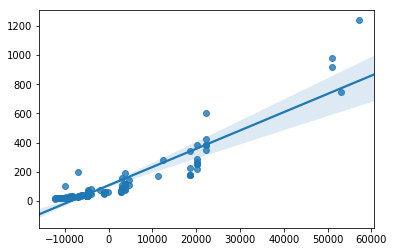

In [22]:
sns.regplot(x=X_train_1d, y=y_train, data=df)